In [1]:
#Dependencies and setup
import pandas as pd
from pathlib import Path
from datetime import date
import matplotlib as plt

In [2]:
#Setting up the Work From Home data set

#Loading the Work From Home data


wfh_data = Path("resources/WFH_ShareAC.csv")
historical_data = Path("resources/historicalweeklydataAC.csv")
hpi_data = Path("resources/HPI_master.csv")
sold_above_list_data = Path("resources/Metro_pct_sold_above_list_uc_sfrcondo_sm_month.csv")
moving_data = Path("resources/SUB-IP-EST2022-CUMCHG.csv")

#Read and store into DataFrame

#WFH data 
wfh_df = pd.read_csv(wfh_data)

#Historical data of FRM (Fixed morgage rates)
history_frm_df = pd.read_csv(historical_data)

#HPI(House Price Index data )
hpi_df = pd.read_csv(hpi_data)

#Houses sold above listing price 
sold_above_df = pd.read_csv(sold_above_list_data)

#Number of people moving out of Cities
moving_df = pd.read_csv(moving_data)


#Clean up the columns
wfh_df = wfh_df[["date","WFH_share"]]
wfh_df.dropna()
sold_above_df.dropna()

#Change date column data type 
wfh_df["date"]=pd.to_datetime(wfh_df["date"])
history_frm_df["Week"]=pd.to_datetime(history_frm_df["Week"])

#Eliminate dates under 2018
wfh_df = wfh_df[(wfh_df["date"] > "2018-01-01")]
wfh_df = wfh_df[(wfh_df["date"] < "2022-01-01")]




In [66]:
#A list oc column names pre covid
pre_covid = []

#A list of column names post covid
post_covid = []

#Used for pre covid date range 
pre = []

#Used for post covid date ranges 
post = []

#setting up the column names as a list, will also contain specified time periods 
for i in range(5):
    pre_covid.append(sold_above_df.columns[i])
    post_covid.append(sold_above_df.columns[i])

#Sets up the data for for the above_list_pre and post list
x=5
for x in range(len(sold_above_df.columns)):
    if sold_above_df.columns[x] <= "2019-12-31":
        pre_covid.append(sold_above_df.columns[x])
        pre.append(sold_above_df.columns[x])
    if sold_above_df.columns[x]  > "2019-12-31" and sold_above_df.columns[x] < "2021-11-30":
        post_covid.append(sold_above_df.columns[x])
        post.append(sold_above_df.columns[x])

#Drops entries with 
above_list_pre = sold_above_df[pre_covid].dropna()
above_list_post = sold_above_df[post_covid].dropna()

city_pre = {}
for o in list(above_list_pre["RegionName"]):
    city_pre[o] = []
    for y in pre:
        city_pre[o].append(((above_list_pre[y].loc[above_list_pre["RegionName"] == o]).iloc[0])*100)
    city_pre[o] = pd.concat([pd.Series(city_pre[o]), pd.Series(pre)], axis =1, keys = ["Percent Sold", "Years"])



city_post = {}
for z in list(above_list_post["RegionName"]):
    city_post[z] = []
    for g in post:
        city_post[z].append(((above_list_post[g].loc[above_list_post["RegionName"] == z]).iloc[0])*100)
    city_post[z] = pd.concat([pd.Series(city_post[z]), pd.Series(post)], axis =1, keys = ["Percent Sold", "Years"])



<Axes: title={'center': 'Pre Covid Home Sale (New York) % '}, xlabel='Years', ylabel='Percentage of homes sold above List Price'>

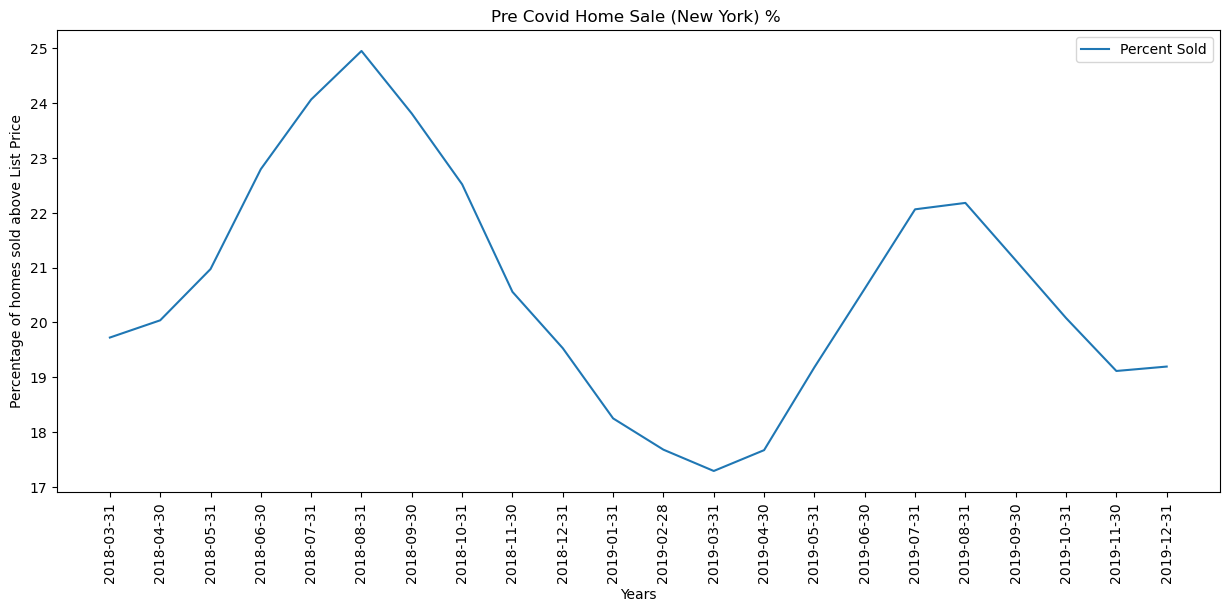

In [55]:
#Pre Covid for New York

city_pre['New York, NY'].plot.line(x = "Years", y = "Percent Sold", ylabel = "Percentage of homes sold above List Price", title = "Pre Covid Home Sale (New York) % ", 
                                   xticks = range(len(pre)), figsize = (15, 6), rot =90)

<Axes: title={'center': 'Post Covid Home Sale (New York) %'}, xlabel='Years', ylabel='Percentage of homes sold above List Price'>

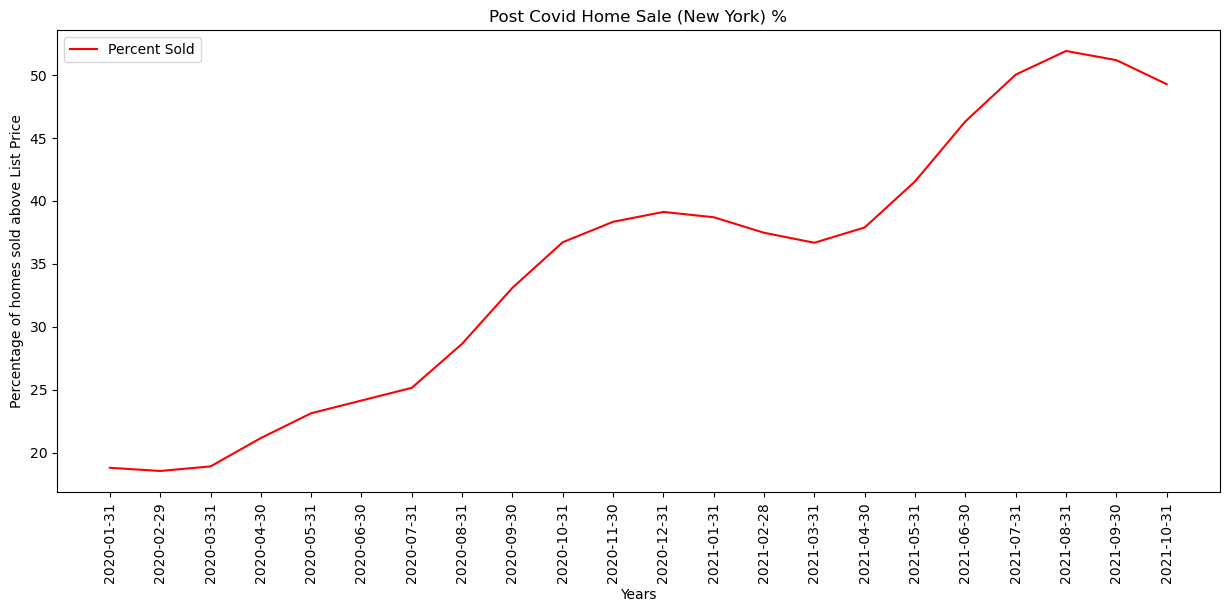

In [63]:
#Post covid for New York 
city_post['New York, NY'].plot.line(x = "Years", y = "Percent Sold", ylabel = "Percentage of homes sold above List Price",  title = "Post Covid Home Sale (New York) %",
                                    xticks = range(len(pre)), figsize = (15, 6), rot =90, color ="red")

<Axes: title={'center': 'Pre Covid Home Sale (Chicago) %'}, xlabel='Years', ylabel='Percentage of homes sold above List Price'>

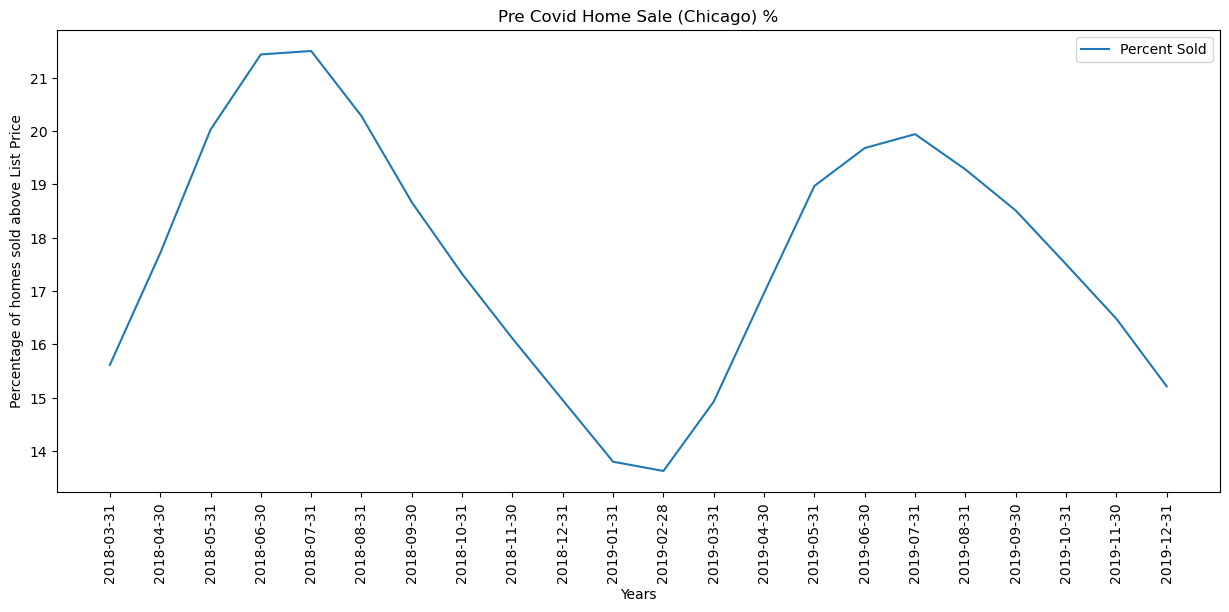

In [67]:
#Pre Covid Chigago
city_pre['Chicago, IL'].plot.line(x = "Years", y = "Percent Sold", ylabel = "Percentage of homes sold above List Price", title = "Pre Covid Home Sale (Chicago) %", xticks = range(len(pre)), figsize = (15, 6), rot =90)


<Axes: title={'center': 'Post Covid Home Sale %'}, xlabel='Years', ylabel='Percentage of homes sold above List Price'>

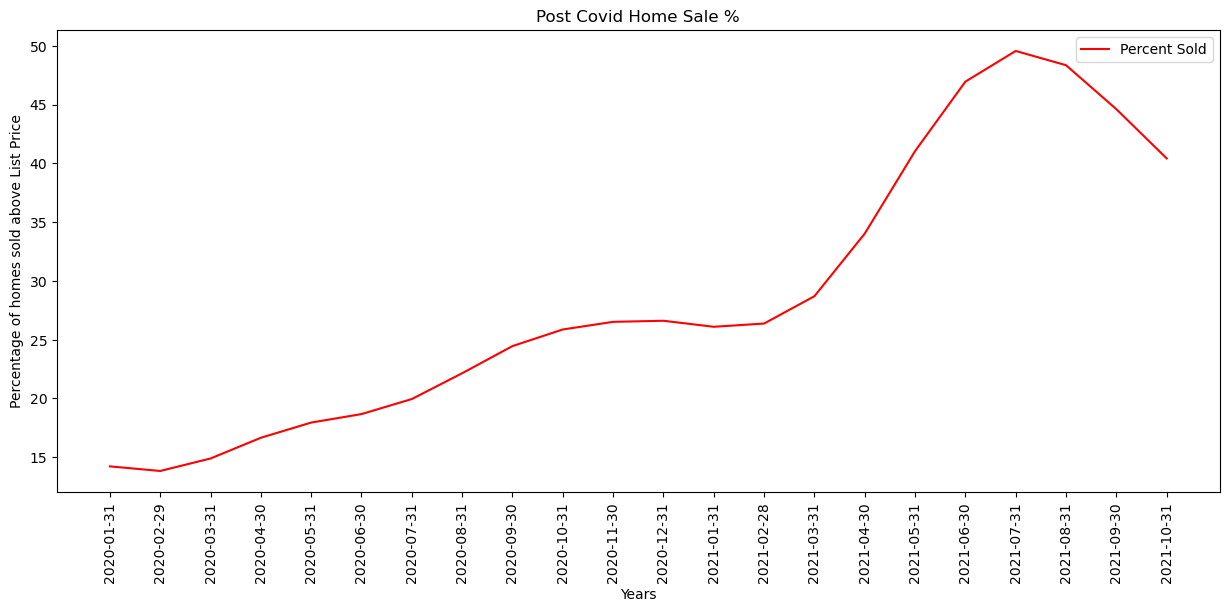

In [68]:
#Post Covid for Chicago
city_post['Chicago, IL'].plot.line(x = "Years", y = "Percent Sold", ylabel = "Percentage of homes sold above List Price", title = "Post Covid Home Sale %",
                                    xticks = range(len(pre)), figsize = (15, 6), rot =90, color ="red")